<a href="https://colab.research.google.com/github/EricWay1024/EricSummer2022/blob/main/DIRECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIRECT Method & DIRECT-L Method

## How DIRECT method works

1. Normalize the search space to the unit hypercube.
2. Identify the set `S` of "potentially optimal" rectangles.
3. For all rectangle `j` in `S`, select sample points within `j` and divide `j` into subrectangles.
4. Go back to 2 unless the maximum number of iterations is reached.

## The difference between DIRECT and DIRECT-L

- DIRECT-L only selects one of several rectangles tied for being "potentially optimial";
- DIRECT-L uses the infinity norm in the definition of the Lipschitz constant instead of the 2-norm (used in the definition of "potentially optimal rectangles").

(Jones, 2020)

## Implementations

[NLopt](https://nlopt.readthedocs.io/en/latest/NLopt_Algorithms/#direct-and-direct-l) provides several versions of the algorithms.

In our problem the two dimensions (width and height) have the same weight, so normalizing (in step 1) should not be a problem, and thus we do not consider the `NOSCAL` implementations.

What we will try next:
- GN_DIRECT
- GN_DIRECT_L
- GN_DIRECT_L_RAND
- GN_ORIG_DIRECT
- GN_ORIG_DIRECT_L

In [2]:
%pip install git+https://github.com/CardiacModelling/BenNevis.git
%pip install nlopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CardiacModelling/BenNevis.git to /tmp/pip-req-build-myr31i1y
  Running command git clone -q https://github.com/CardiacModelling/BenNevis.git /tmp/pip-req-build-myr31i1y
     |████████████████████████████████| 43 kB 2.0 MB/s 
  Created wheel for nevis: filename=nevis-0.0.5-py3-none-any.whl size=459821 sha256=1e1f8c76990ffa2f91476d8013a4bf9d72bdbde6bb37050d395453ec1c3cbc96
  Stored in directory: /tmp/pip-ephem-wheel-cache-gxb5am_k/wheels/90/1d/f4/95c4cad271f4e0edefe68d43f3fd060ef7e11dfbc4a3c7a4cf
Successfully built nevis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 424 kB 32.1 MB/s 


In [6]:
import nevis
import nlopt
import numpy as np
import matplotlib.pyplot as plt
nevis.download_os_terrain_50()

Downloaded, unpacked, and processed file already found: Skipping.


In [87]:
f = nevis.linear_interpolant()
f_grad = nevis.linear_interpolant(grad=True)
x_max, y_max = nevis.dimensions()

points = []
pre_max = [] # heighest hill that has been visited

def myfunc(u, grad):
    x, y = u
    points.append([x, y])
    z, (gx, gy) = f_grad(x, y)
    if grad.size > 0:
        grad[0] = gx
        grad[1] = gy
    if not pre_max:
        pre_max.append(z)
    else:
        pre_max.append(max(z, pre_max[-1]))
    return z


The stop criterion here is the number of function evaluations. In fact, after 3e4 evaluations all methods appear to stop making progress.

In [88]:
def run(method):
    global points, pre_max
    opt = nlopt.opt(method, 2)
    opt.set_lower_bounds([0, 0])
    opt.set_upper_bounds([x_max, y_max])
    opt.set_max_objective(myfunc)
    opt.set_maxeval(int(3e4))
    points = []
    pre_max = []
    x, y = opt.optimize([0, 0])
    z = opt.last_optimum_value()
    print(len(points))
    return x, y, z, points, pre_max

In [89]:
methods = [
    'GN_DIRECT',
    'GN_DIRECT_L',
    'GN_DIRECT_L_RAND',
    'GN_ORIG_DIRECT',
    'GN_ORIG_DIRECT_L',
]

results = []

for method_name in methods:
    method = eval(f'nlopt.{method_name}')
    x, y, z, points, pre_max = run(method)
    c = nevis.Coords(gridx=x, gridy=y)
    hill, d = nevis.Hill.nearest(c)
    results.append((method_name, x, y, z, hill, d, points, pre_max))

30000
30000
30000
15327
30007


Using implementation: GN_DIRECT
Congratulations!
You landed at an altitude of 1082m.
  https://opentopomap.org/#marker=15/56.568204/-4.882029
You are 11m from the nearest named hill top, "Stob Ghabhar",
  ranked the 107th heighest in GB.
  http://hillsummits.org.uk/htm_summit/237.htm


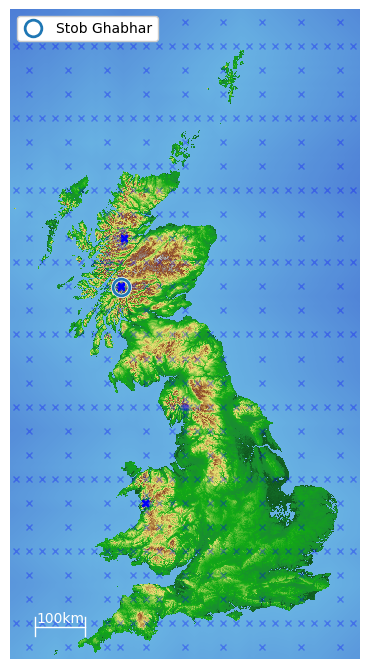

In [90]:
method_name, x, y, z, hill, d, points, pre_max = results[0]
print('Using implementation:', method_name)
nevis.print_result(x, y, z)

nevis.plot(
    labels={
        hill.name: hill.coords
    },
    points=np.array(points),
    zoom=1/40
)
plt.show()

Using implementation: GN_DIRECT_L
Congratulations!
You landed at an altitude of 1142m.
  https://opentopomap.org/#marker=15/57.290543/-5.101793
You are 80m from the nearest named hill top, "Stob a' Choire Dhomhain",
  ranked the 44th heighest in GB.


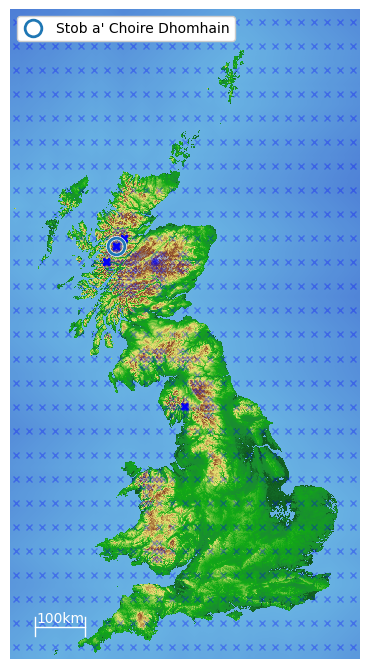

In [91]:
method_name, x, y, z, hill, d, points, pre_max = results[1]
print('Using implementation:', method_name)
nevis.print_result(x, y, z)
nevis.plot(
    labels={
        hill.name: hill.coords
    },
    points=np.array(points),
    zoom=1/40
)
plt.show()

Using implementation: GN_DIRECT_L_RAND
Congratulations!
You landed at an altitude of 1181m.
  https://opentopomap.org/#marker=15/57.287524/-5.114834
You are 30m from the nearest named hill top, "Carn Eighe",
  ranked the 22d heighest in GB.
  http://hillsummits.org.uk/htm_summit/803.htm


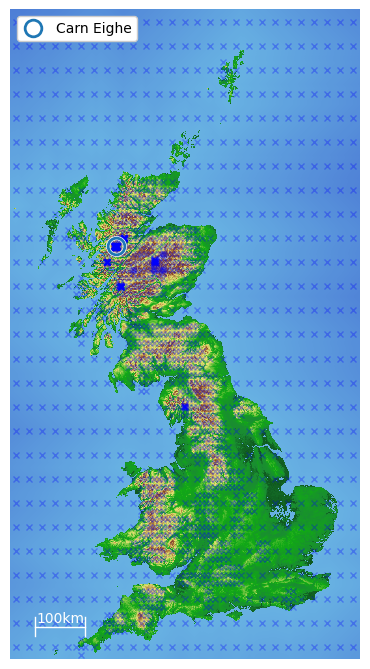

In [92]:
method_name, x, y, z, hill, d, points, pre_max = results[2]
print('Using implementation:', method_name)
nevis.print_result(x, y, z)

nevis.plot(
    labels={
        hill.name: hill.coords
    },
    points=np.array(points),
    zoom=1/40
)
plt.show()

Using implementation: GN_ORIG_DIRECT
Interesting!
You landed at an altitude of 990m.
  https://opentopomap.org/#marker=15/49.766806/-7.55716
You are 57.1km from the nearest named hill top, "The Bull Rock",
  ranked the 19140th heighest in GB.
  http://hillsummits.org.uk/htm_portrait/21254.htm


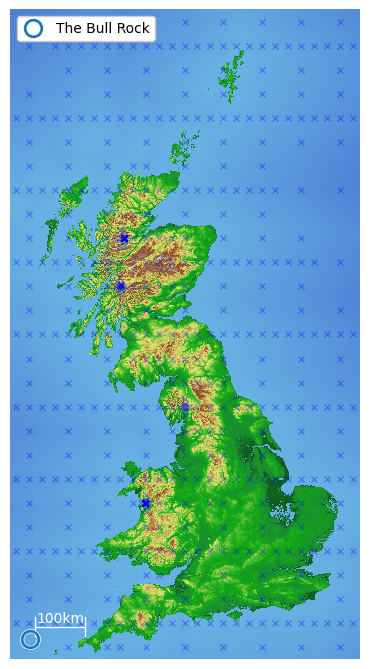

In [93]:
method_name, x, y, z, hill, d, points, pre_max = results[3]
print('Using implementation:', method_name)
nevis.print_result(x, y, z)

nevis.plot(
    labels={
        hill.name: hill.coords
    },
    points=np.array(points),
    zoom=1/40
)
plt.show()

Using implementation: GN_ORIG_DIRECT_L
Congratulations!
You landed at an altitude of 1345m.
  https://opentopomap.org/#marker=15/56.796773/-5.003538
You are 17m from the nearest named hill top, "Ben Nevis",
  ranked the 1st heighest in GB.
  http://hillsummits.org.uk/htm_summit/278.htm


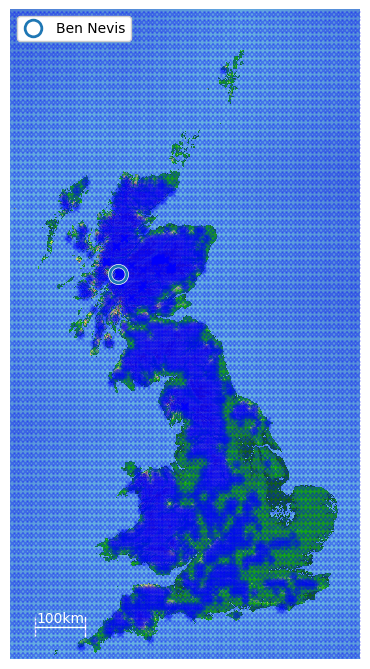

In [94]:
method_name, x, y, z, hill, d, points, pre_max = results[4]
print('Using implementation:', method_name)
nevis.print_result(x, y, z)
nevis.plot(
    labels={
        hill.name: hill.coords
    },
    points=np.array(points),
    zoom=1/40
)
plt.show()

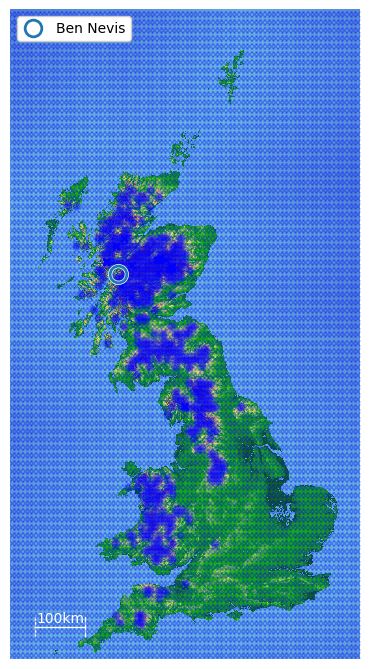

In [96]:
nevis.plot(
    labels={
        hill.name: hill.coords
    },
    points=np.array(points[:20000]),
    zoom=1/40
)
plt.show()

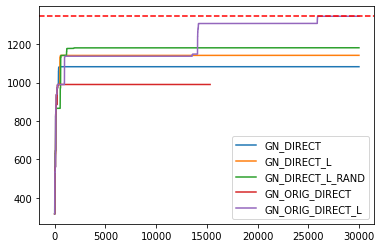

In [95]:
for i in range(5):
    plt.plot(results[i][7], label=results[i][0])

plt.axhline(y=1344.9, color='r', linestyle='--')
plt.legend()
plt.show()